In [13]:
import numpy as np
import pandas as pd
import datatable as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

In [14]:
data = dt.fread('./data/Mall_Customers.csv')

In [15]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3


In [16]:
data = data.to_pandas()

In [17]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data.shape

(200, 5)

In [19]:
data['CustomerID'].nunique()

200

In [20]:
 data.drop('CustomerID',axis = 1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int32 
 2   Annual Income (k$)      200 non-null    int32 
 3   Spending Score (1-100)  200 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 4.0+ KB


In [22]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
# For the purpose of learning  & demonstaration we will use only two columns 
# so that we can visualize our clusters 
# For clustering we will use Annual Income & Spending Score columns

data_2col = data[['Annual Income (k$)','Spending Score (1-100)']]

In [24]:
data_2col.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Building Dendrogram

Text(0, 0.5, 'Euclidian Distances')

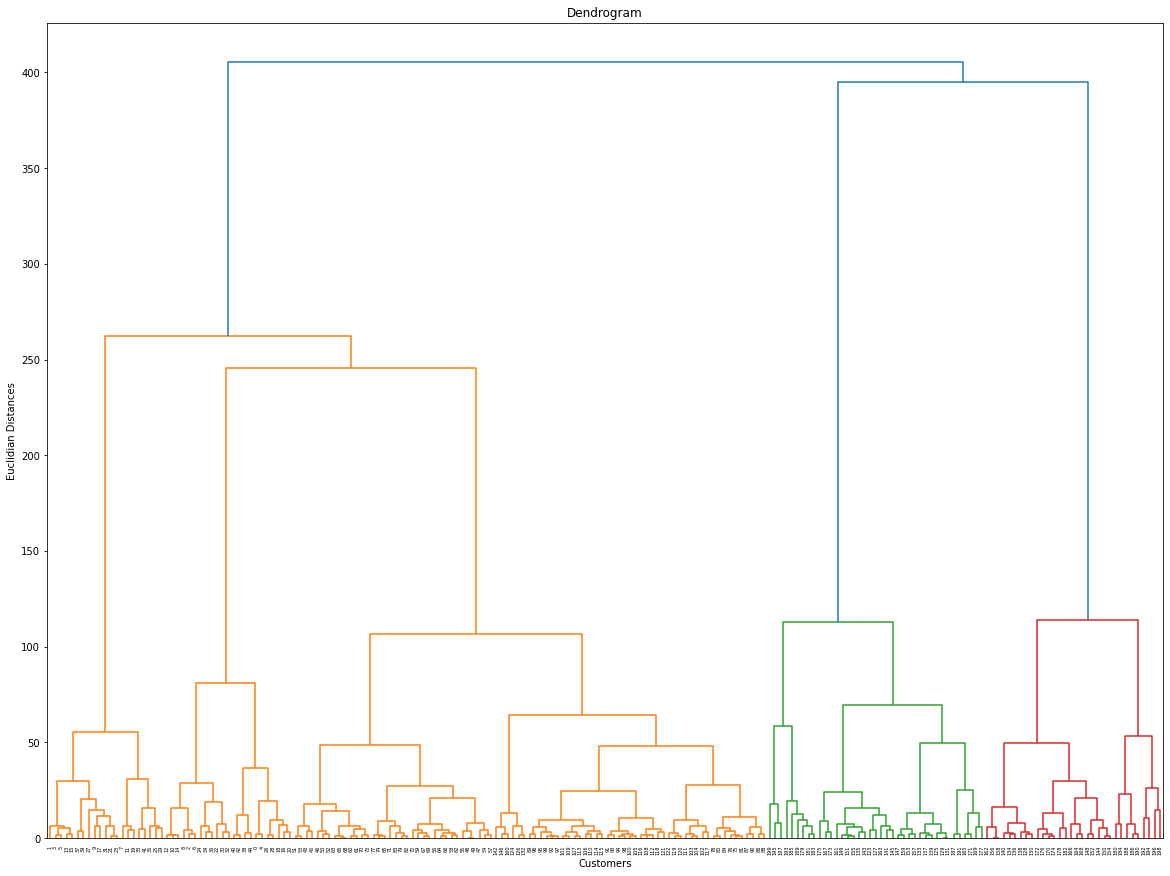

In [31]:
plt.figure(figsize = (20,15))
dendrogram = sch.dendrogram(sch.linkage(data_2col, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distances')

In [32]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_2col)

In [33]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [34]:
data_clust = data_2col.copy()

In [35]:
data_clust['Cluster']= y_hc

In [36]:
data_clust

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

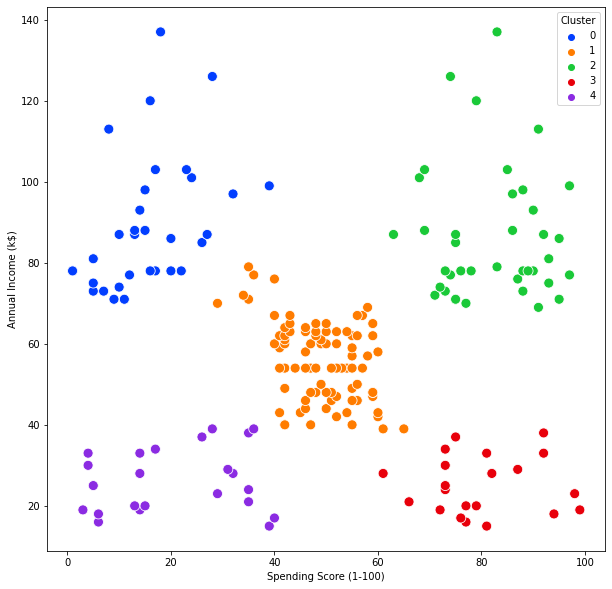

In [37]:
#sns.set()
plt.figure(figsize = (10,10))
sns.scatterplot(data = data_clust, x = 'Spending Score (1-100)', y ='Annual Income (k$)' 
                ,hue='Cluster', palette='bright', s = 100)

In [59]:
data_all = data.copy()

In [60]:
data_all['Cluster']= y_kmeans

In [61]:
data_all.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

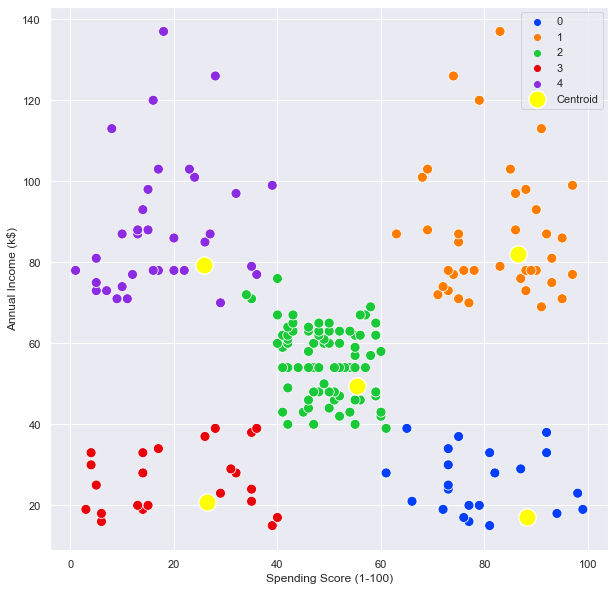

In [102]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = data_clust, x = 'Spending Score (1-100)', y ='Annual Income (k$)' 
                ,hue='Cluster', palette='bright', sizes='Age', s = 100)
sns.scatterplot(data = mydata, x = 'x',y = 'y', s=300, color = 'yellow', label = 'Centroid')

In [83]:
kmeans.cluster_centers_[:,1]

array([79.36363636, 82.12820513, 49.51851852, 20.91304348, 17.11428571])

In [84]:
kmeans.cluster_centers_[:,0]

array([25.72727273, 86.53846154, 55.2962963 , 26.30434783, 88.2       ])

In [94]:
mydata = pd.DataFrame(kmeans.cluster_centers_,columns=('x','y'))

In [95]:
mydata

,x,y
0,25.727273,79.363636
1,86.538462,82.128205
2,55.296296,49.518519
3,26.304348,20.913043
4,88.200000,17.114286


<AxesSubplot:xlabel='x', ylabel='y'>

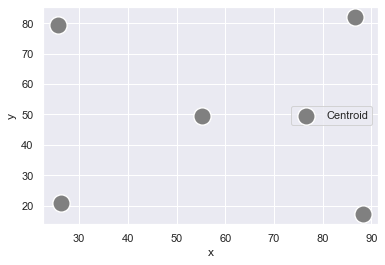

In [96]:
sns.scatterplot(data = mydata, x = 'x',y = 'y', s=300, color = 'grey', label = 'Centroid')

In [90]:
kmeans.cluster_centers_[:,0].reshape(1,-1)

array([[25.72727273, 86.53846154, 55.2962963 , 26.30434783, 88.2       ]])

In [91]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [103]:
# Clustering taking all columns into consideration

In [104]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [105]:
df = data.copy()

In [107]:
df['Genre']=df['Genre'].map({'Male':0,'Female':1})

In [108]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [109]:
# Using elbow method

wcss = []
for num in range(1,11):
    kmeans = KMeans(num)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [110]:
wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58350.65449462818,
 51573.264799764795,
 44357.32664902665,
 40929.64125876996,
 37533.58640925383]

Text(0, 0.5, 'WCSS')

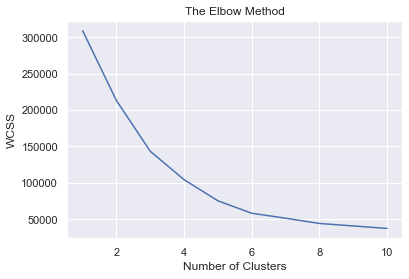

In [115]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

We can see that for 6 clusters we have steeper slope



In [129]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(df)

In [130]:
y_kmeans

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [131]:
df_clust = df.copy()

In [132]:
df_clust['Cluster']= y_kmeans

In [133]:
df_clust.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

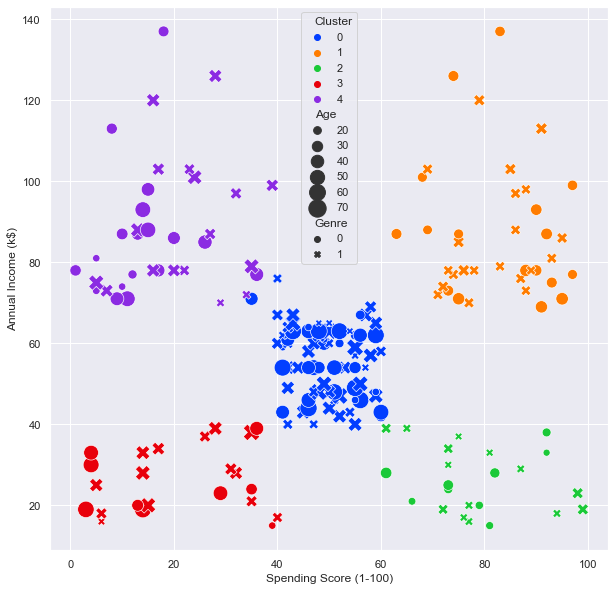

In [146]:
#sns.set()
plt.figure(figsize = (10,10))
sns.scatterplot(data = df_clust, x = 'Spending Score (1-100)', y ='Annual Income (k$)' 
                ,hue='Cluster', palette='bright', s = 400, size = 'Age', style = 'Genre', sizes= (50,300))

In [111]:
mydf =  pd.DataFrame(kmeans.cluster_centers_,columns=('x','y'))

ValueError: Shape of passed values is (10, 4), indices imply (10, 2)

In [141]:
range(100,300)

range(100, 300)